In [104]:
# Nescessary imports

%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

import os

# import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set random seed
random.seed(42)

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
%autoreload 2
from classes.data_wraper import Dataset

In [106]:
data_dir = os.path.join(os.getcwd(), 'data')
paths = {
    'FOVfiting2' : os.path.join(data_dir, 'mapsCeline_FOVfitting_2_pol-60.mat'),
    '3quadrants2' : os.path.join(data_dir, 'mapsCeline_3quadrants_2_pol-60.mat'),
    'FOVfiting3' : os.path.join(data_dir, 'mapsCeline_FOVfitting_3_pol-60.mat'),
    '3quadrants3' : os.path.join(data_dir, 'mapsCeline_3quadrants_3_pol-60.mat'),
    'FOVfiting4' : os.path.join(data_dir, 'mapsCeline_FOVfitting_4_pol-60.mat'),
    '3quadrants4' : os.path.join(data_dir, 'mapsCeline_3quadrants_4_pol-60.mat'),
    'FOVfiting5' : os.path.join(data_dir, 'mapsCeline_FOVfitting_5_pol-60.mat'),
    '3quadrants5' : os.path.join(data_dir, 'mapsCeline_3quadrants_5_pol-60.mat'),
    'FOVfiting6' : os.path.join(data_dir, 'mapsCeline_FOVfitting_6_pol-60.mat'),
    '3quadrants6' : os.path.join(data_dir, 'mapsCeline_3quadrants_6_pol-60.mat'),   
    'FOVfiting9' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9_pol-60.mat'),
    '3quadrants9' : os.path.join(data_dir, 'mapsCeline_3quadrants_9_pol-60.mat'),
    'FOVfiting9a' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9a_polNP.mat'),
    '3quadrants9a' : os.path.join(data_dir, 'mapsCeline_3quadrants_9a_polNP.mat')
}

In [107]:
calibration_maps = [paths['FOVfiting2']]
dataset = Dataset(calibration_maps)

Added data from c:\Users\f076048\Documents\Stage_CSL\data\mapsCeline_FOVfitting_2_pol-60.mat
New lenght: 297


In [108]:
""" ind = random.randint(0, len(dataset.map1_list)-1)
orig = dataset.combined_list[ind].copy()
dataset.preprocess_data()
preprocessed = dataset.combined_list[ind]
reversed = dataset.rev_preprocess(preprocessed, ind)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(orig)
ax[0].set_title('Original')
cbar = fig.colorbar(ax[0].imshow(orig), ax=ax[0])
cbar.ax.set_ylabel('Intensity', rotation=270)

ax[1].imshow(reversed)
ax[1].set_title('Reversed')
cbar = fig.colorbar(ax[1].imshow(reversed), ax=ax[1])
cbar.ax.set_ylabel('Intensity', rotation=270)

plt.show()

print('Max difference: ', np.max(np.abs(orig - reversed)))
print('Mean difference: ', np.mean(np.abs(orig - reversed)))
print('Mean squared difference: ', np.mean(np.square(orig - reversed))) """

" ind = random.randint(0, len(dataset.map1_list)-1)\norig = dataset.combined_list[ind].copy()\ndataset.preprocess_data()\npreprocessed = dataset.combined_list[ind]\nreversed = dataset.rev_preprocess(preprocessed, ind)\n\nfig, ax = plt.subplots(1, 2, figsize=(15, 15))\nax[0].imshow(orig)\nax[0].set_title('Original')\ncbar = fig.colorbar(ax[0].imshow(orig), ax=ax[0])\ncbar.ax.set_ylabel('Intensity', rotation=270)\n\nax[1].imshow(reversed)\nax[1].set_title('Reversed')\ncbar = fig.colorbar(ax[1].imshow(reversed), ax=ax[1])\ncbar.ax.set_ylabel('Intensity', rotation=270)\n\nplt.show()\n\nprint('Max difference: ', np.max(np.abs(orig - reversed)))\nprint('Mean difference: ', np.mean(np.abs(orig - reversed)))\nprint('Mean squared difference: ', np.mean(np.square(orig - reversed))) "

In [109]:
dataset.preprocess_data()

In [110]:
dataset.crop_data(128)

In [111]:
%autoreload 2
from classes.utils import plot_map, plot_radial_profile
from scipy.ndimage import rotate

189


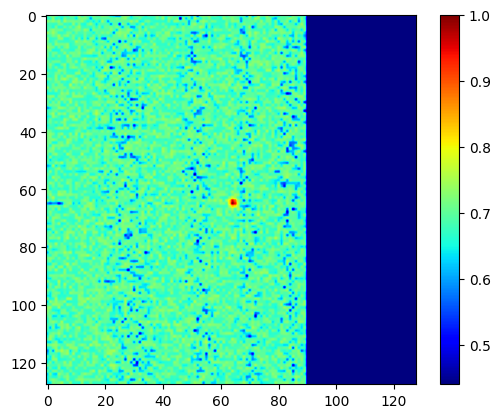

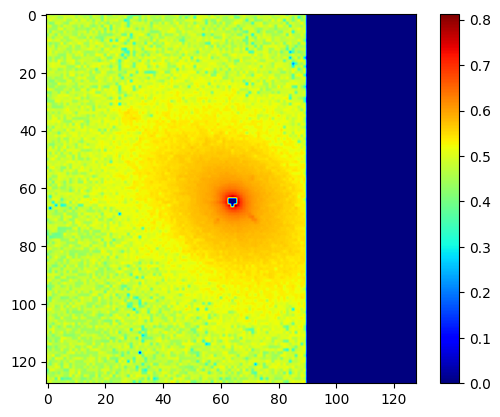

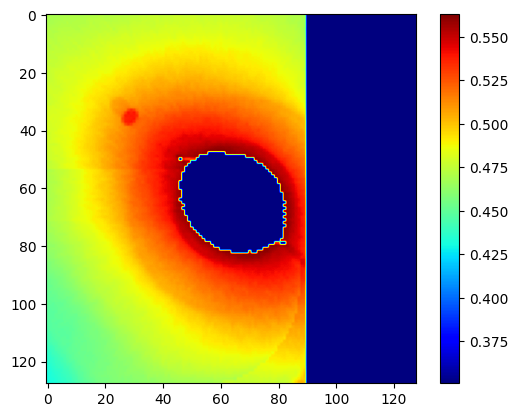

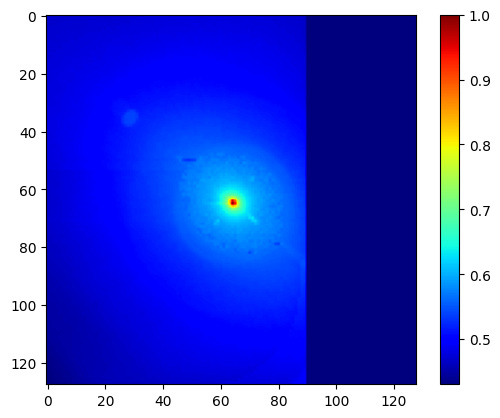

In [112]:
ind = 189 #random.randint(0, len(dataset.map1_list) -1)
print(ind)
map1 = dataset.map1_list[ind]
map2 = dataset.map2_list[ind]
map3 = dataset.map3_list[ind]
combined = dataset.combined_list[ind]
plot_map(map1)
plot_map(map2)
plot_map(map3)
plot_map(combined)

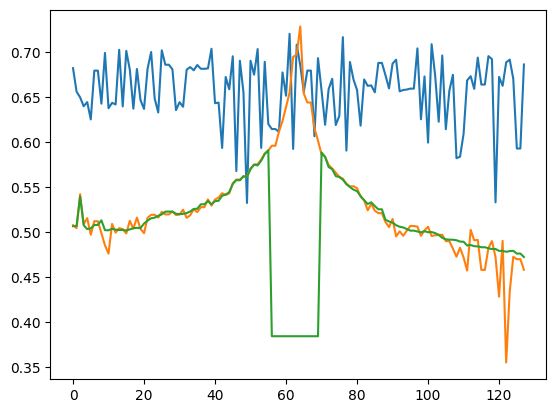

In [114]:
ind = random.randint(0, len(dataset.map1_list)-1)
map1 = dataset.map1_list[ind]
map2 = dataset.map2_list[ind]
map3 = dataset.map3_list[ind]
combined = dataset.combined_list[ind]
azimut = dataset.azimut_list[ind]
plot_radial_profile([map1, map2, map3], azimut)

angle:  377.850299881671


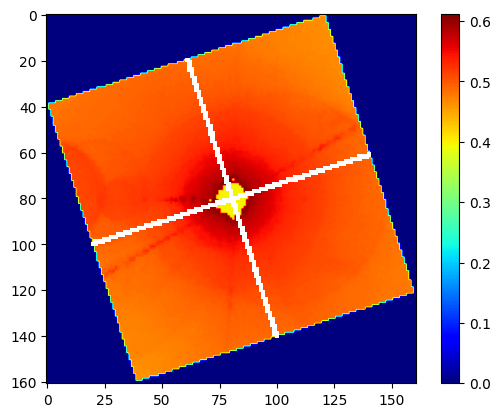

In [115]:
ind = random.randint(0, len(dataset.map1_list)-1)
map = dataset.map3_list[ind]
map[map.shape[0]//2,:] = np.nan
map[:, map.shape[0]//2] = np.nan
angle = dataset.azimut_list[ind] + 90
print('angle: ', angle)
# rotate map while handling nan values
map_rot = rotate(map, angle, reshape=True, order=0)
# replace 0 values with min value of not 0 values
#map_rot[np.isnan(map_rot)] = np.nanmin(map_rot)
plt.imshow(map_rot, cmap='jet')
plt.colorbar()
# draw a horizontal line at the center of the map
#plt.axhline(y=map_rot.shape[0]//2, color='r', linestyle='-')
plt.show()